EDA on the weapon of the famous on-line multiplayer game PUBG 

Here the different guns will be analyzed to give players a better understanding what will work best for them and help them to tailor their play Stilez accordingly 

Data was obtained by the online spread sheet accessible here 

https://docs.google.com/spreadsheets/d/1hH7ziGeJS2WB6QuAkb16XWFRHeqyKjCX7ZC04vGilBk/edit#gid=0 

Importing the modules that will be used in this analysis

In [70]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

importing the CSV file for the data on the data sheet 

In [71]:
gun_df=pd.read_csv("PUBG_Weapon_Stats.csv")
gun_df.head()

,Class,Name,Ammo,Mag,Ext Mag,Fire Rate,Damage,Bullet Speed,Drag,Reload,Range,Spread,Scoping,Scoped Spread,DPS,Sustained DPS
0,Sniper,AWM,0.300,5.0,7.0,1.85,105,945.0,0.787,4.60,650.0,7.5,0.0040,0.03,57,42
1,Sniper,M24,7.62,5.0,7.0,1.80,79,790.0,0.750,4.20,600.0,7.5,0.0055,0.04,44,33
2,Sniper,Kar98k,7.62,5.0,5.0,1.90,75,760.0,0.900,4.00,500.0,8.0,0.0070,0.06,39,28
3,Sniper,Win94,0.45,8.0,8.0,0.60,66,760.0,0.801,4.00,500.0,8.0,0.0070,0.06,110,60
4,DMR,MK14,7.62,10.0,20.0,0.09,61,853.0,0.723,3.68,500.0,7.0,0.0100,0.07,678,223


Analize the data for missing values

<AxesSubplot:>

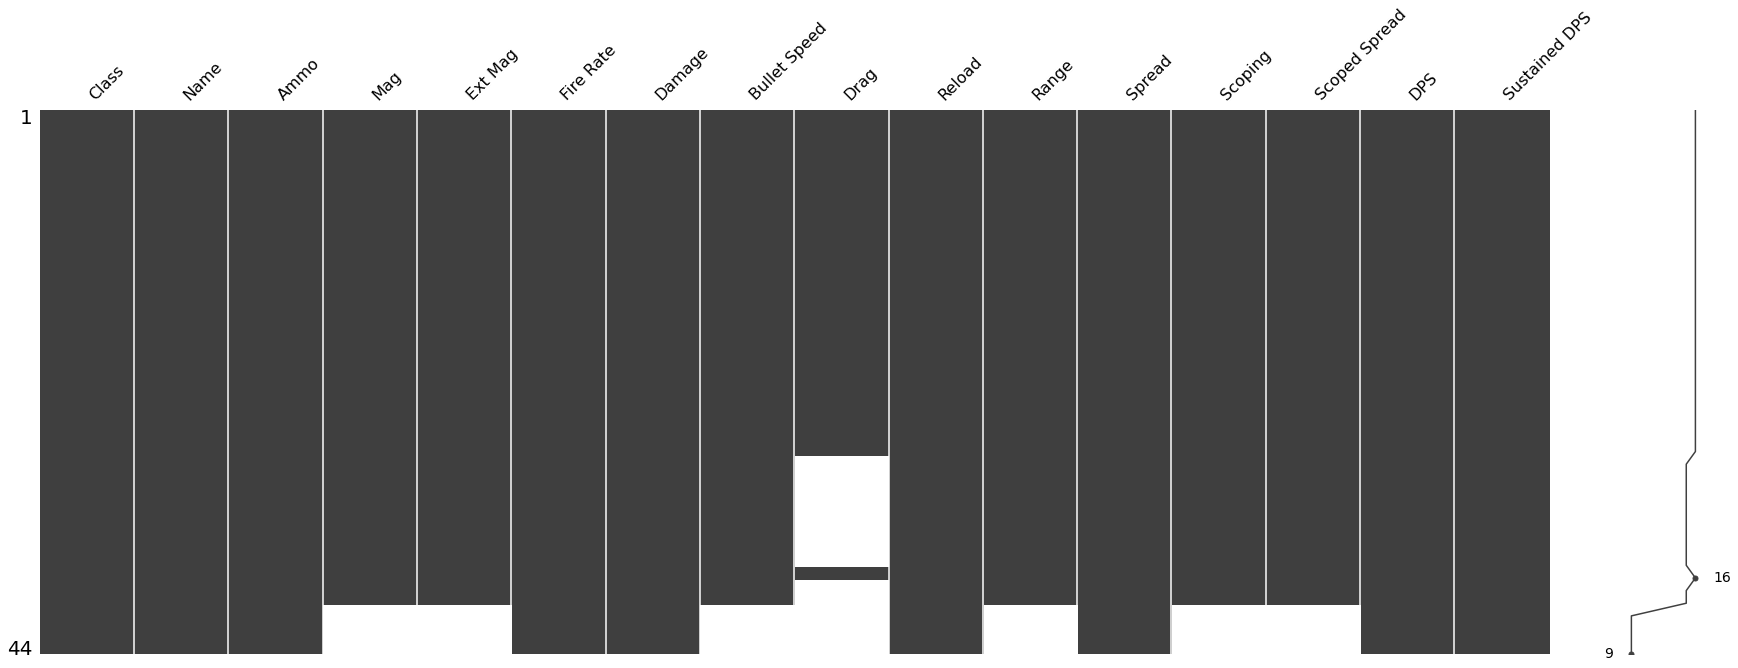

In [72]:
missingno.matrix(gun_df, figsize = (30,10))

The missing data is due to 2 different circumstances  

1. Drag - Here the data is missing and it has not been included in the spreadsheet - this will be replaced with 0 

2. The game also contains weapons that are not classified as a gun I.E it does not work with a projectile, these will have to be removed - you can see them because the mag, ext. mag and scoping are all missing. This is expected because they do not work with Bullets and thus are not relevant data to use. These will be resolved below 

1st replace all the Nan values in the drag column with 0 

In [73]:
gun_df["Drag"]=gun_df["Drag"].replace(np.nan,0)

Removing all the weapons that are not guns 

In [74]:
gun_df.dropna(axis=0,inplace=True)

<AxesSubplot:>

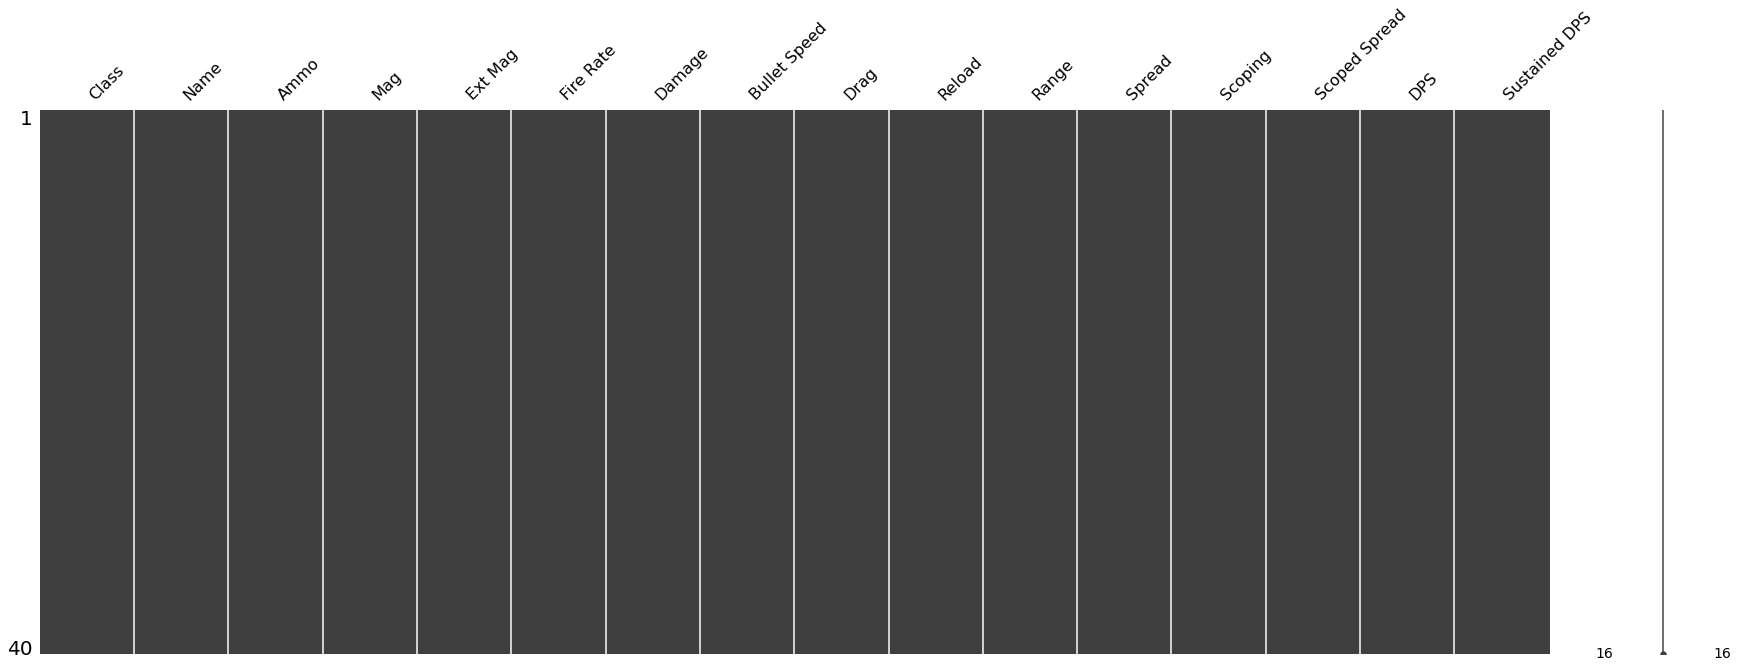

In [75]:
missingno.matrix(gun_df, figsize = (30,10))

All missing values have been replaced and the data is now ready to be analyzed 

_______________________________________________________________________________

EDA 

Show all the different weapons

C:\Users\basti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

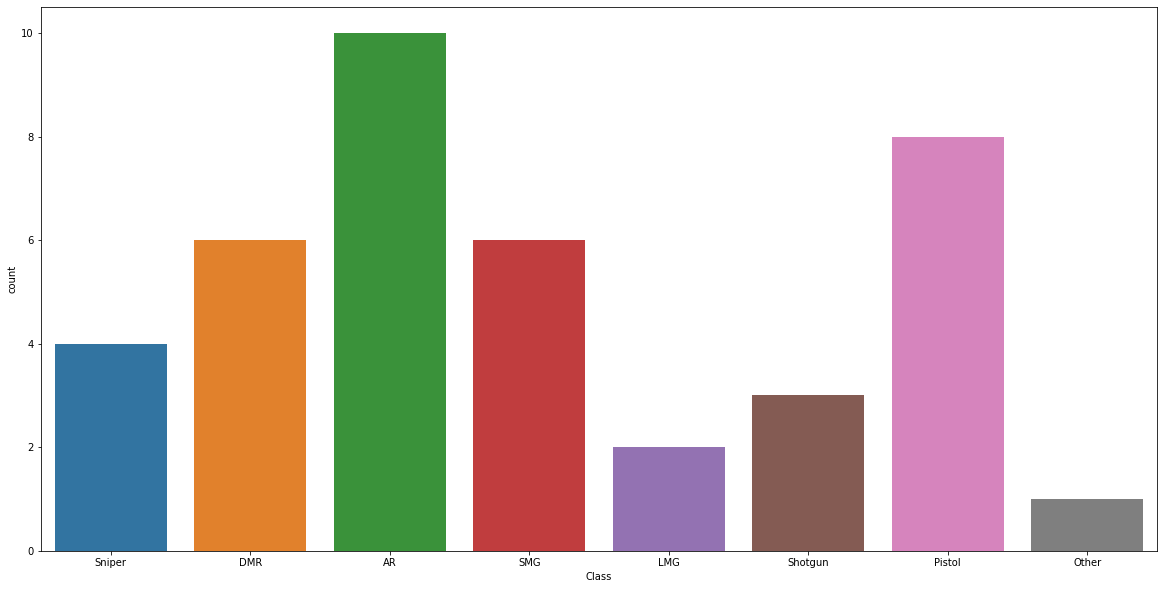

In [76]:
plt.figure(figsize=(20,10))
sns.countplot(gun_df['Class'])


Here we can see that there is a lot more Assault rifles and pistols, which mean that a player is much more Lickly to find a weapon in this class  

Similarly, we can determine that players will not be using weapons in their other class which is the crossbow and LMG because the verity in these classes is a lot lower. 

it can be determent that players can expect to encounter players wielding Assault rifles and Pistols in the early start of the game when players still are looking for supplies 



C:\Users\basti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


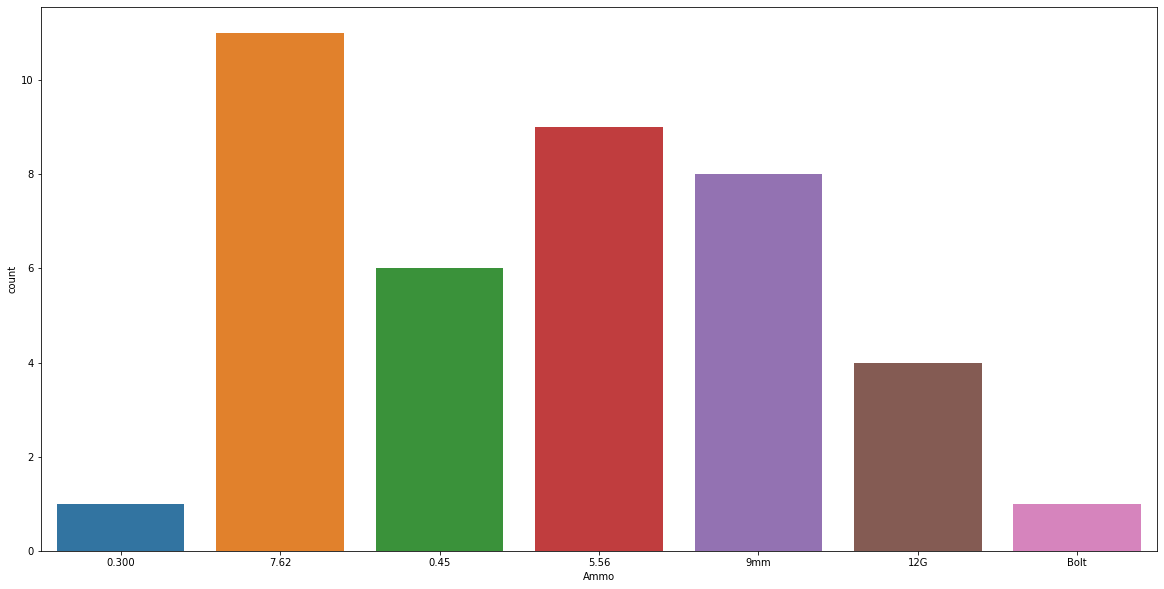

In [77]:
# Plotting the diffirnt types of Ammo that is found in the game 
plt.figure(figsize=(20,10))
sns.countplot(gun_df['Ammo'])
plt.show()

Here we can see that players should look for a gun that uses 7.62-millimeter Ammo, because a lot more guns use this Ammo is  

relevant to assume that a player has a lot better chance to come across this Ammo and it can be concluded that a player should look for weapons that uses these Ammo types  

Players should stay away from the 0.300 magnum and the crossbow because these guns use the Ammo that is very particular it  
can be assumed that these will be a lot harder to find and thus will not be very affective in combat 


<AxesSubplot:xlabel='Class', ylabel='Damage'>

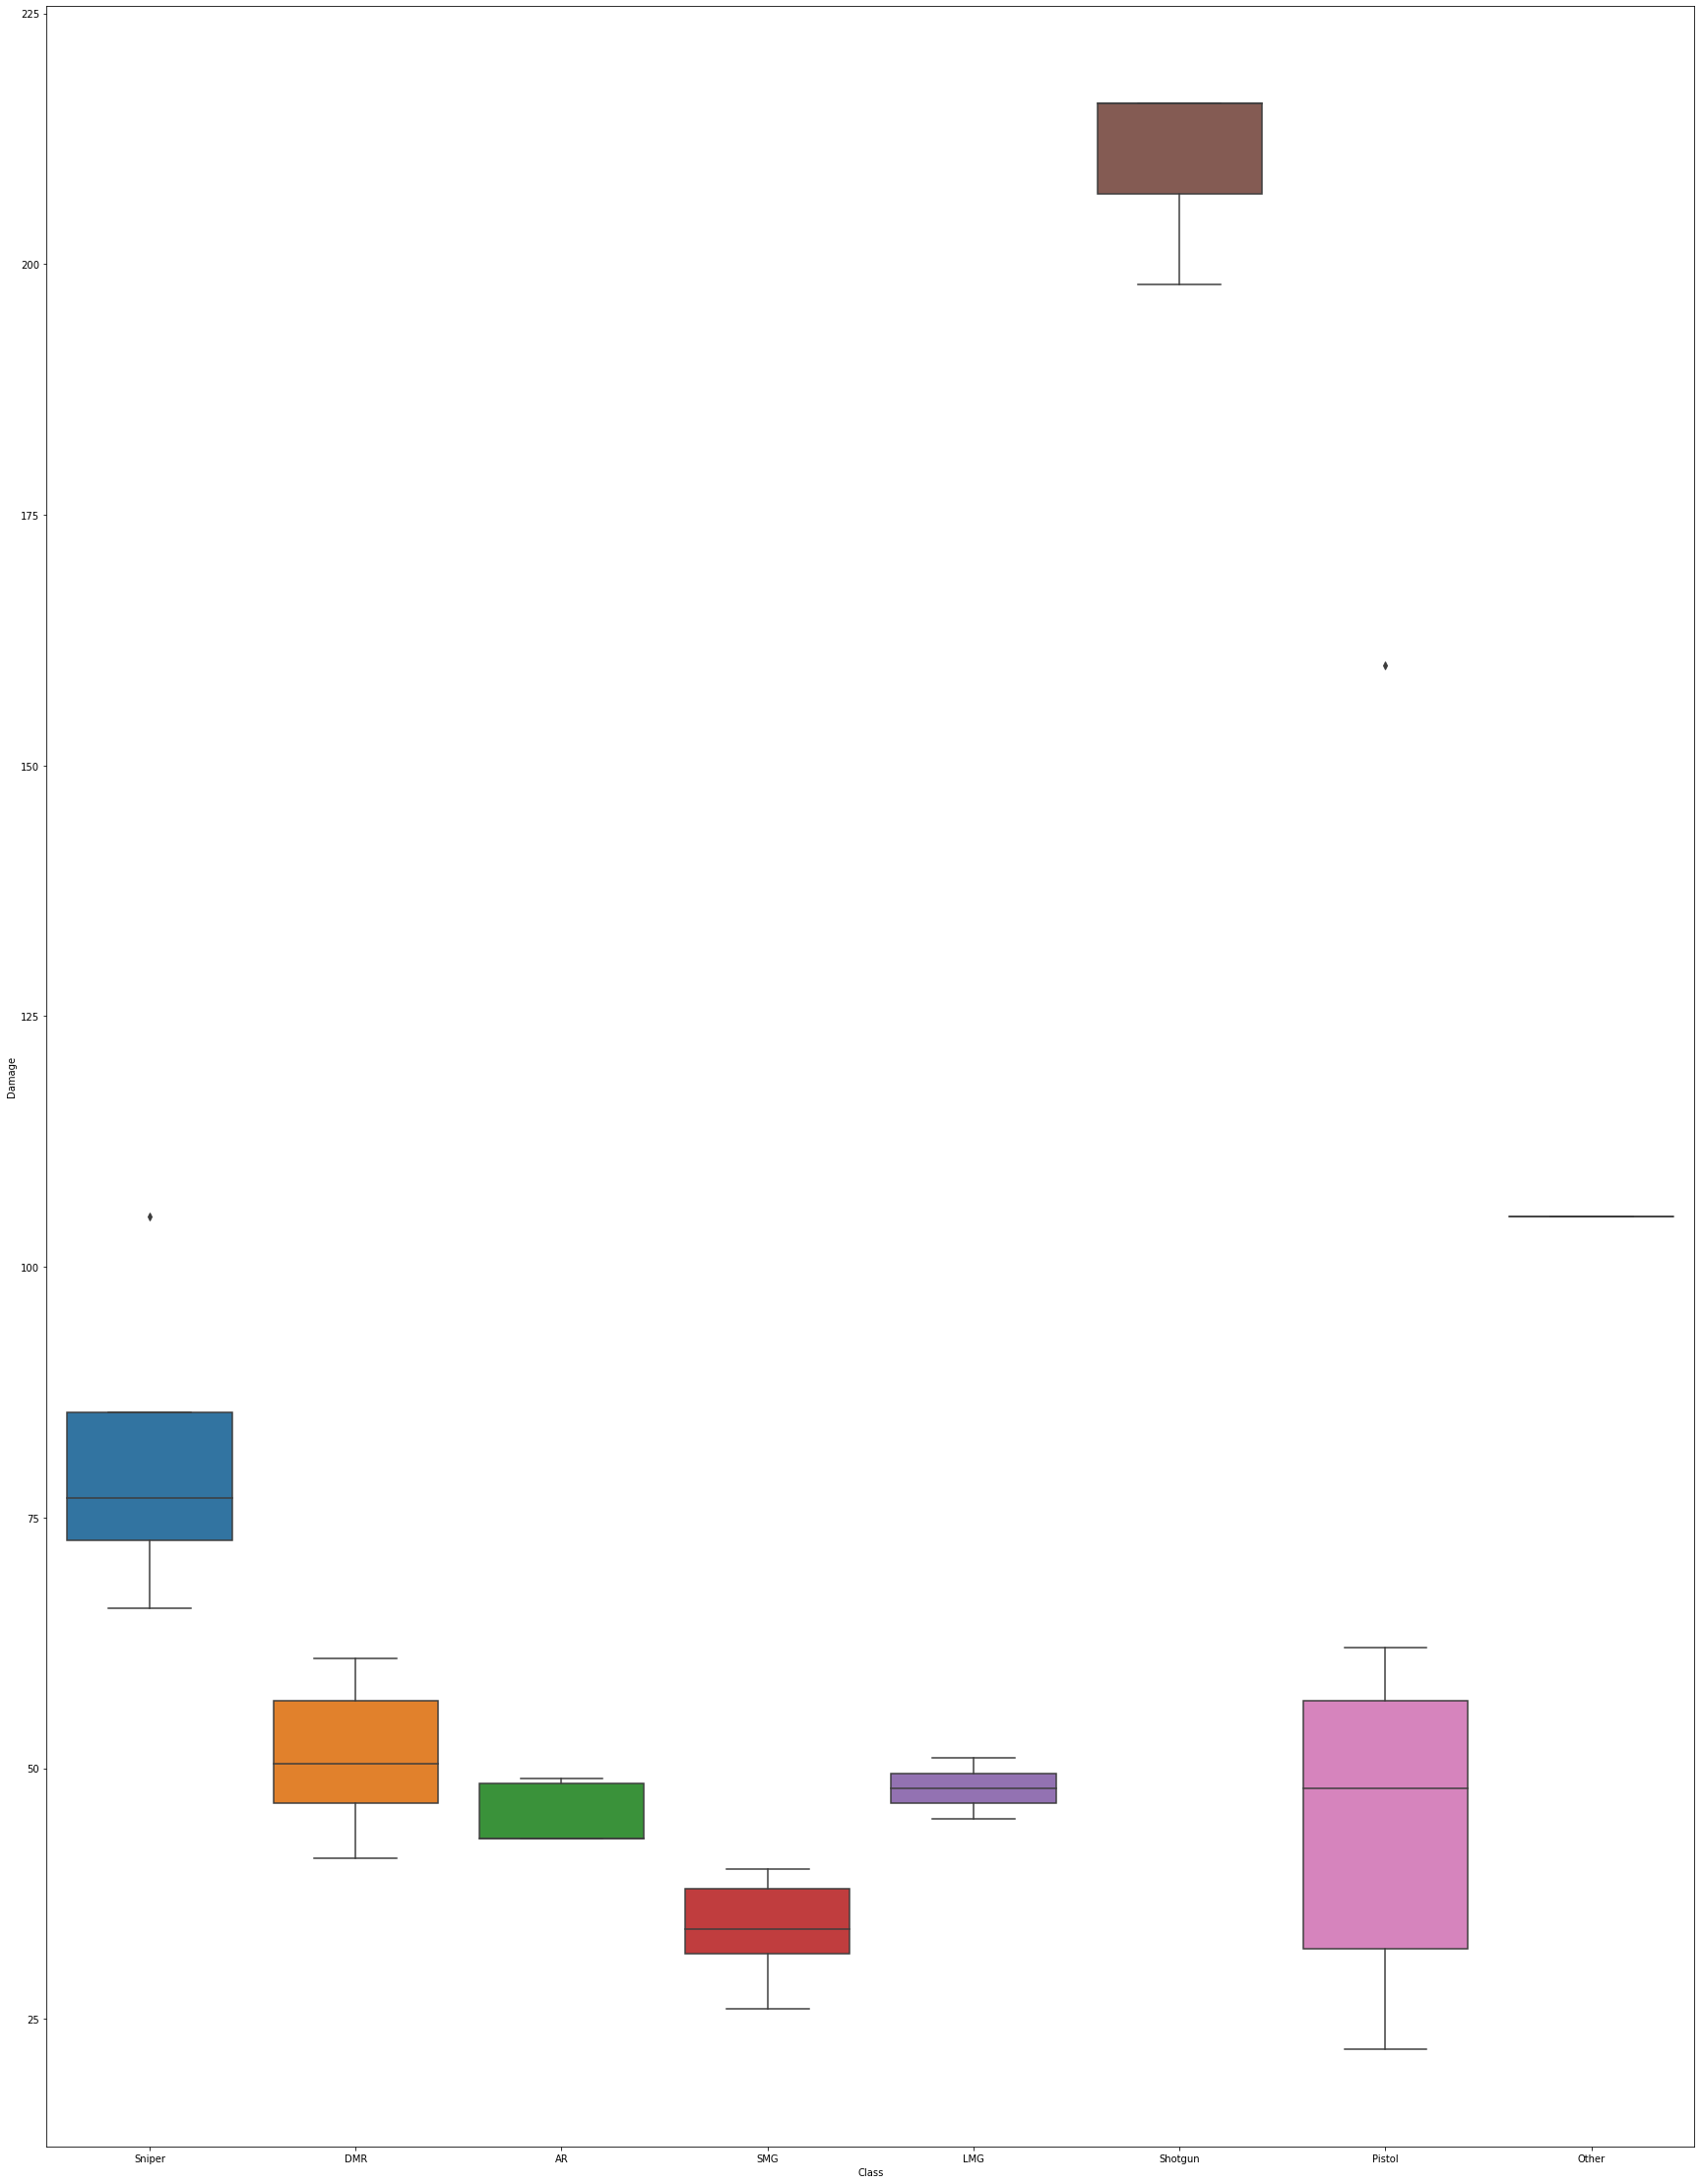

In [78]:
#Damage potental of wepons 
class_by_damage_group = gun_df.groupby('Class')['Damage'].mean().reset_index()
plt.figure(figsize=(30,40))
sns.boxplot(x=gun_df['Class'],y=gun_df['Damage'],data=gun_df)

The damage stats  

1 we can see that shot guns have by far the most damage,  
followed by the crossbow and the sniper rifle class. 

when looking at the data we can see that Pistols and Snipers both have outliers, but the rest of the classes are balanced and  in balance. 

almsot all of the classes are skewed expect LMG, which means that LMGS behave the same,  
damage while it does not matter which LMG you pick up, however there is a big difference in the pistol and this means that  
it matters a lot which pistol you get and decide to pick up  


Summarized  
looking at damage, shot guns are by far the best, followed by sniper rifles, i would not recommend looking at the crossbow because it has a very restricted to a rare ammo type and would be hard to find ammo for it to be considered effective. 

<AxesSubplot:xlabel='Class', ylabel='Sustained DPS'>

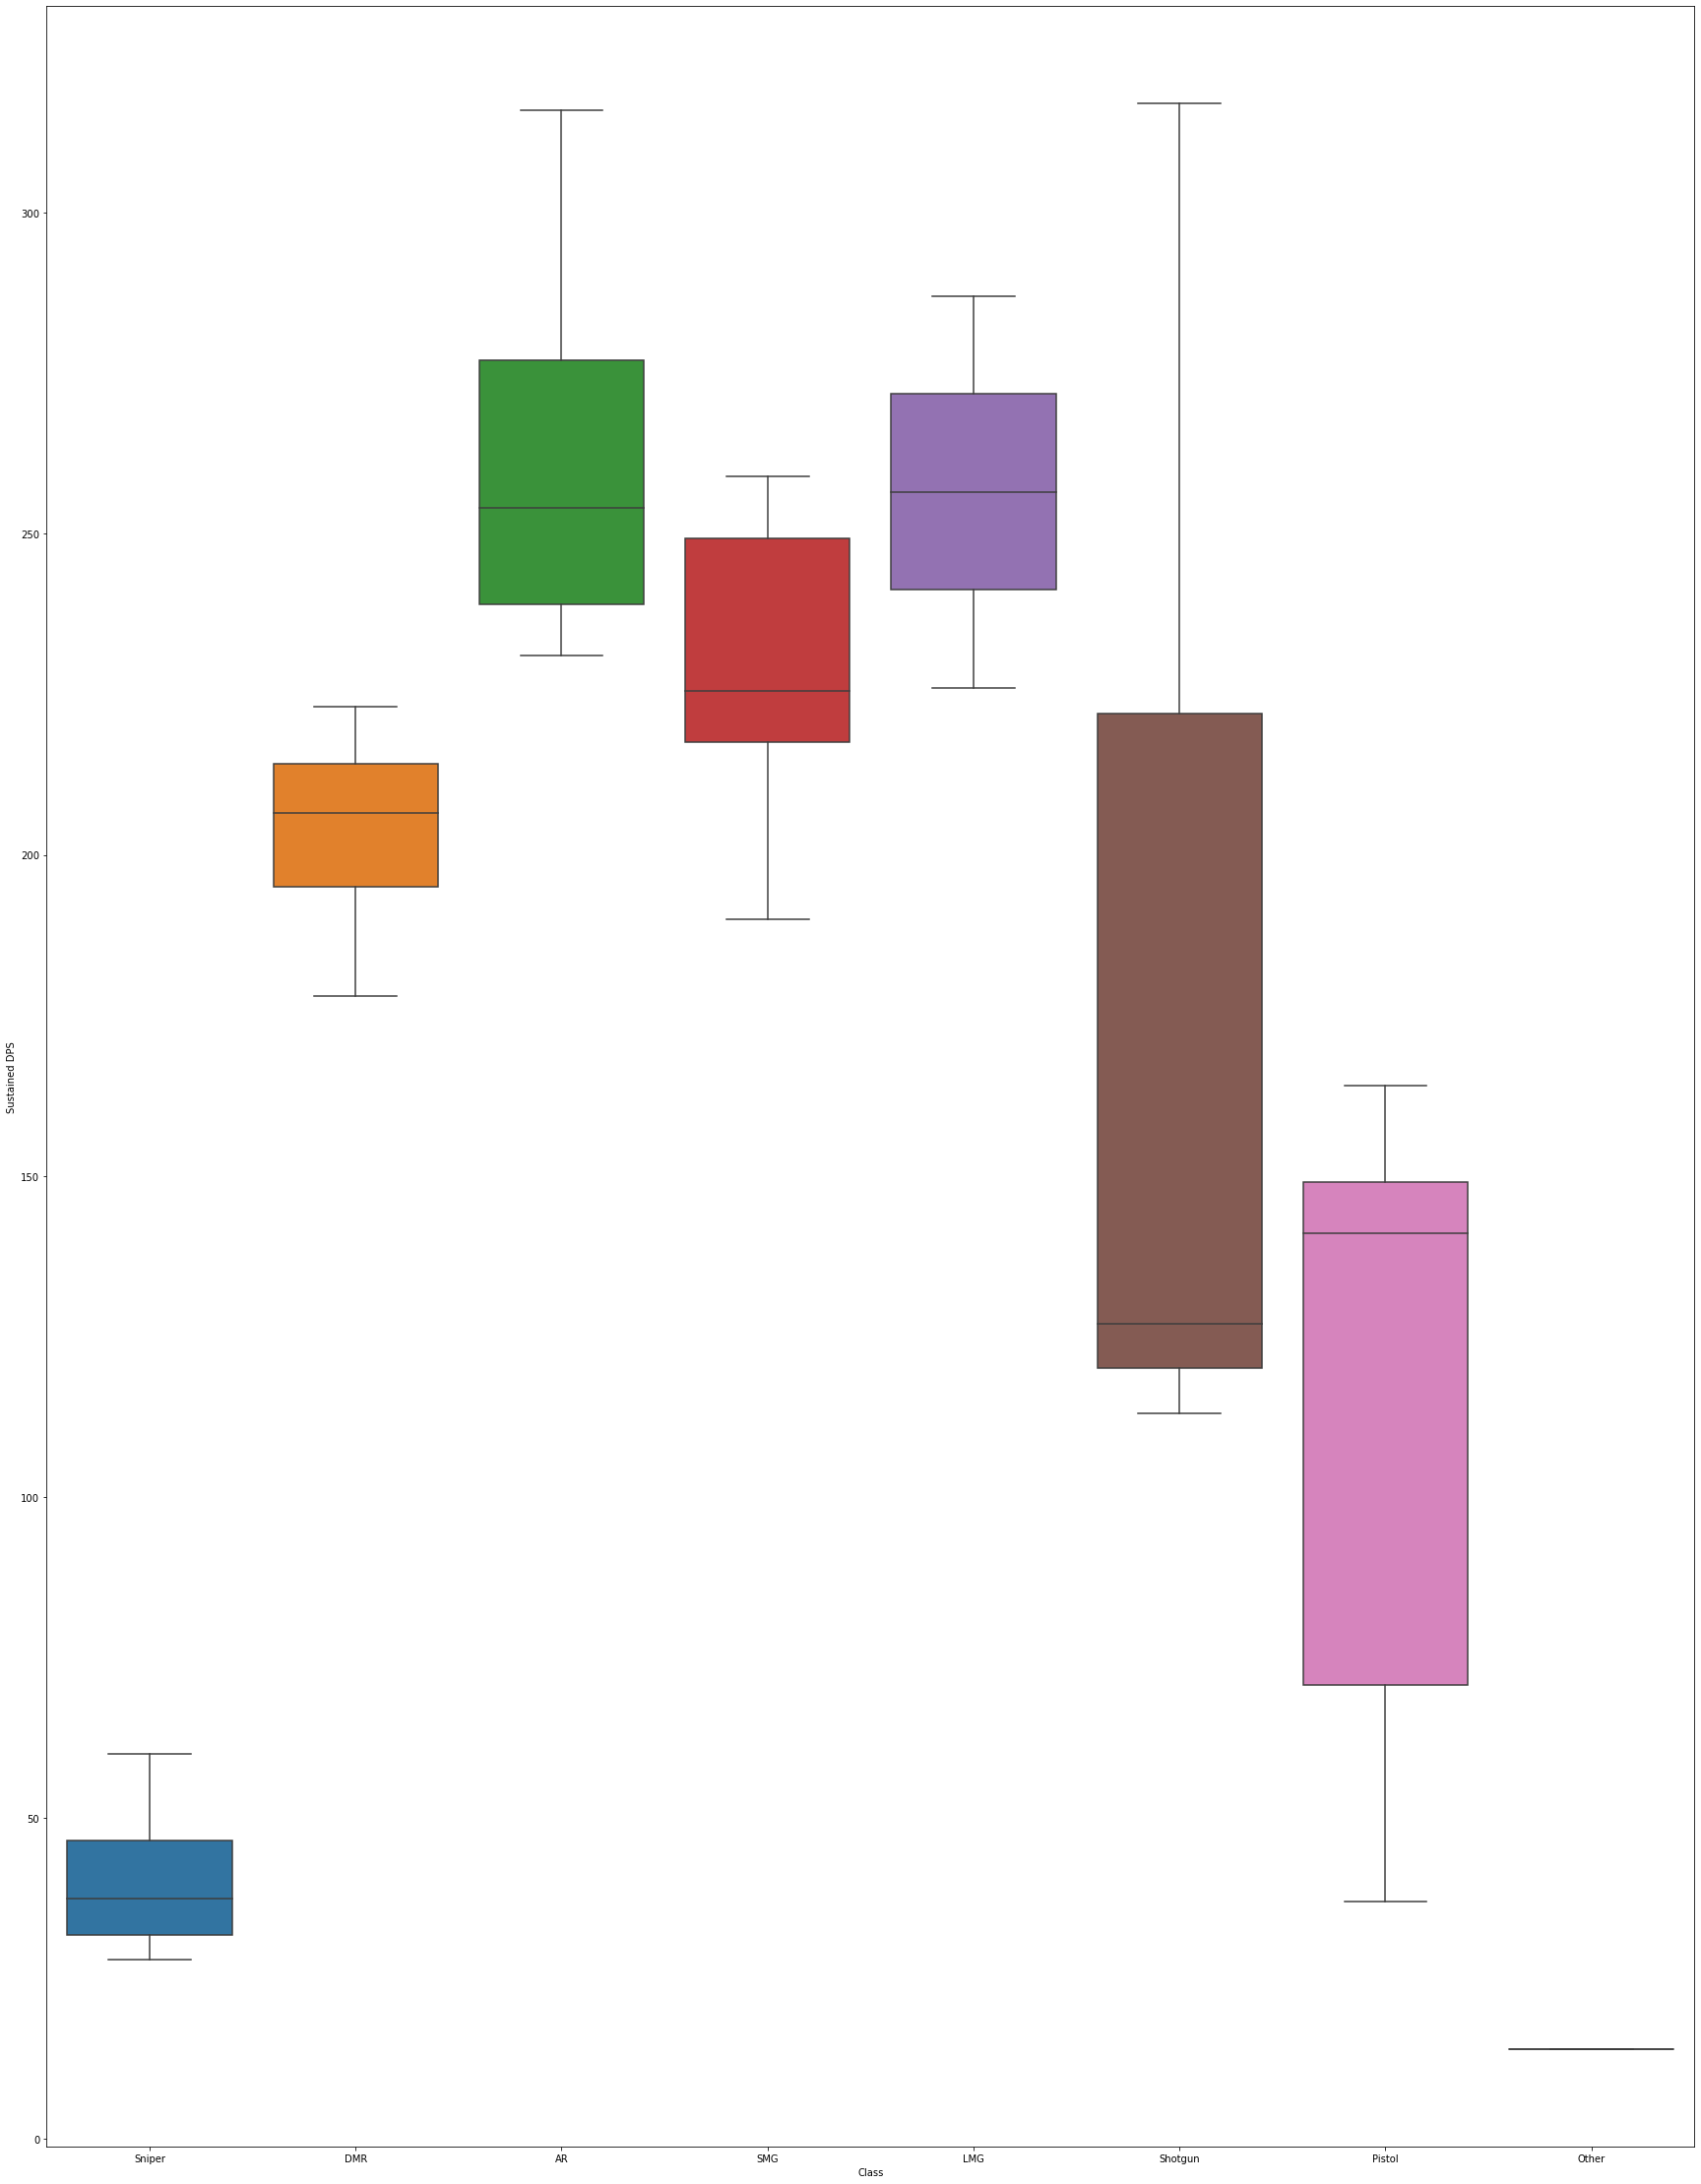

In [79]:
# data grouped by class and sustaind DPS 
suppresive_capability = gun_df.groupby('Class')['Sustained DPS'].mean().reset_index()
plt.figure(figsize=(30,40))
sns.boxplot(x=gun_df['Class'],y=gun_df['Sustained DPS'],data=gun_df)

Compare sustained DPS, 

This is the weapons capability to do damage over time, 
looking at the data we can see that shot guns vary widely, which means that it depends a lot on the model you have, reasons for this could be fire speed and ammo count. 


snipers have the least amount of sustained dps, this means that if you would like to use a sniper you should make every shot 
count because it deals the least amount of damage over time. 

The best weapon class to use according to the data would be the Assault rifle or the lmg, because it provides the most damage per second then the rest of the classes, this could be due to the fact that the magazine size fire rate and damage is higher than the over classes, we can deduce that these classes are far better to use when there is a lot of targets  
and the sniper rifle is better when focusing on a single target. 


<AxesSubplot:xlabel='Class', ylabel='Bullet Speed'>

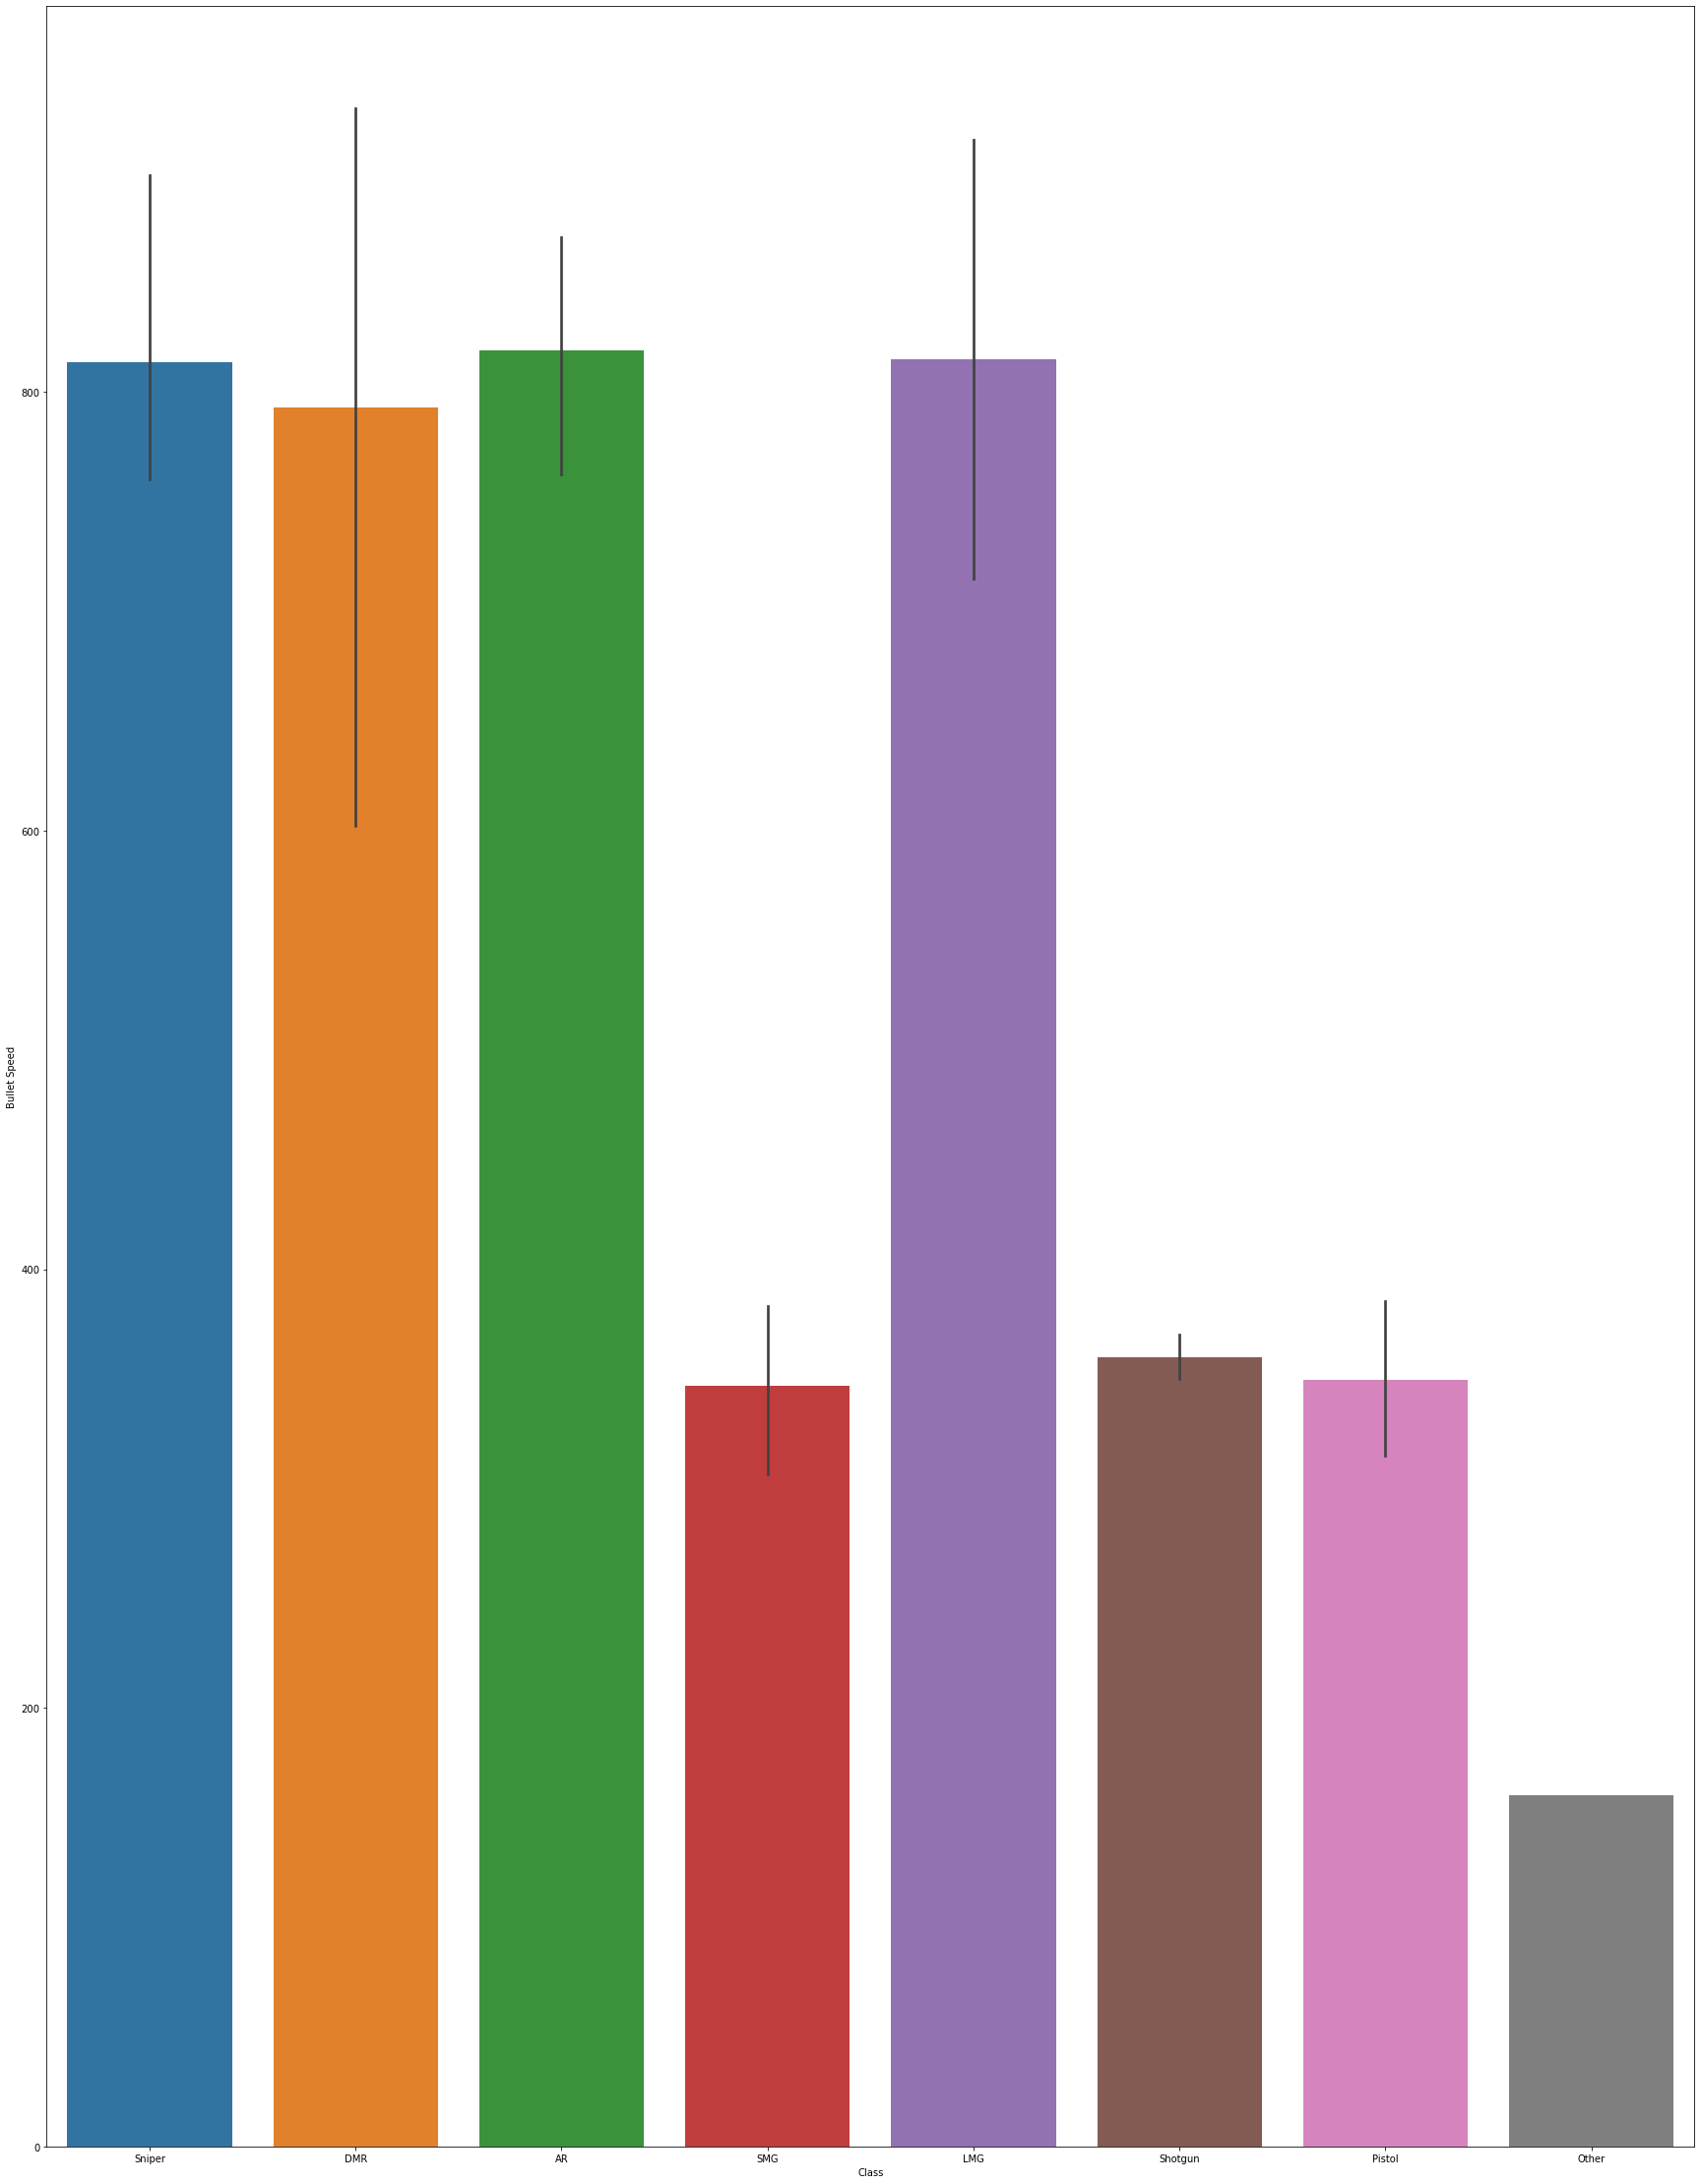

In [80]:
# The bullet speed of the classes 
bulletSpeed_grouped = gun_df.groupby('Class')['Bullet Speed'].mean().reset_index()
plt.figure(figsize=(30,40))
sns.barplot(x=gun_df['Class'],y=gun_df['Bullet Speed'],data=bulletSpeed_grouped)

Here we can see that the Assault rifle class has the fasted bullets followed by the LMG and sniper. 

This means that these 3 classes have the least amount of travel time from gun to target, so these classes are the best to use when fighting over a distance because these classes will reach their targets fist and thus will give the player a small advantage that can turn the tide of battle. 


<AxesSubplot:xlabel='Class', ylabel='Range'>

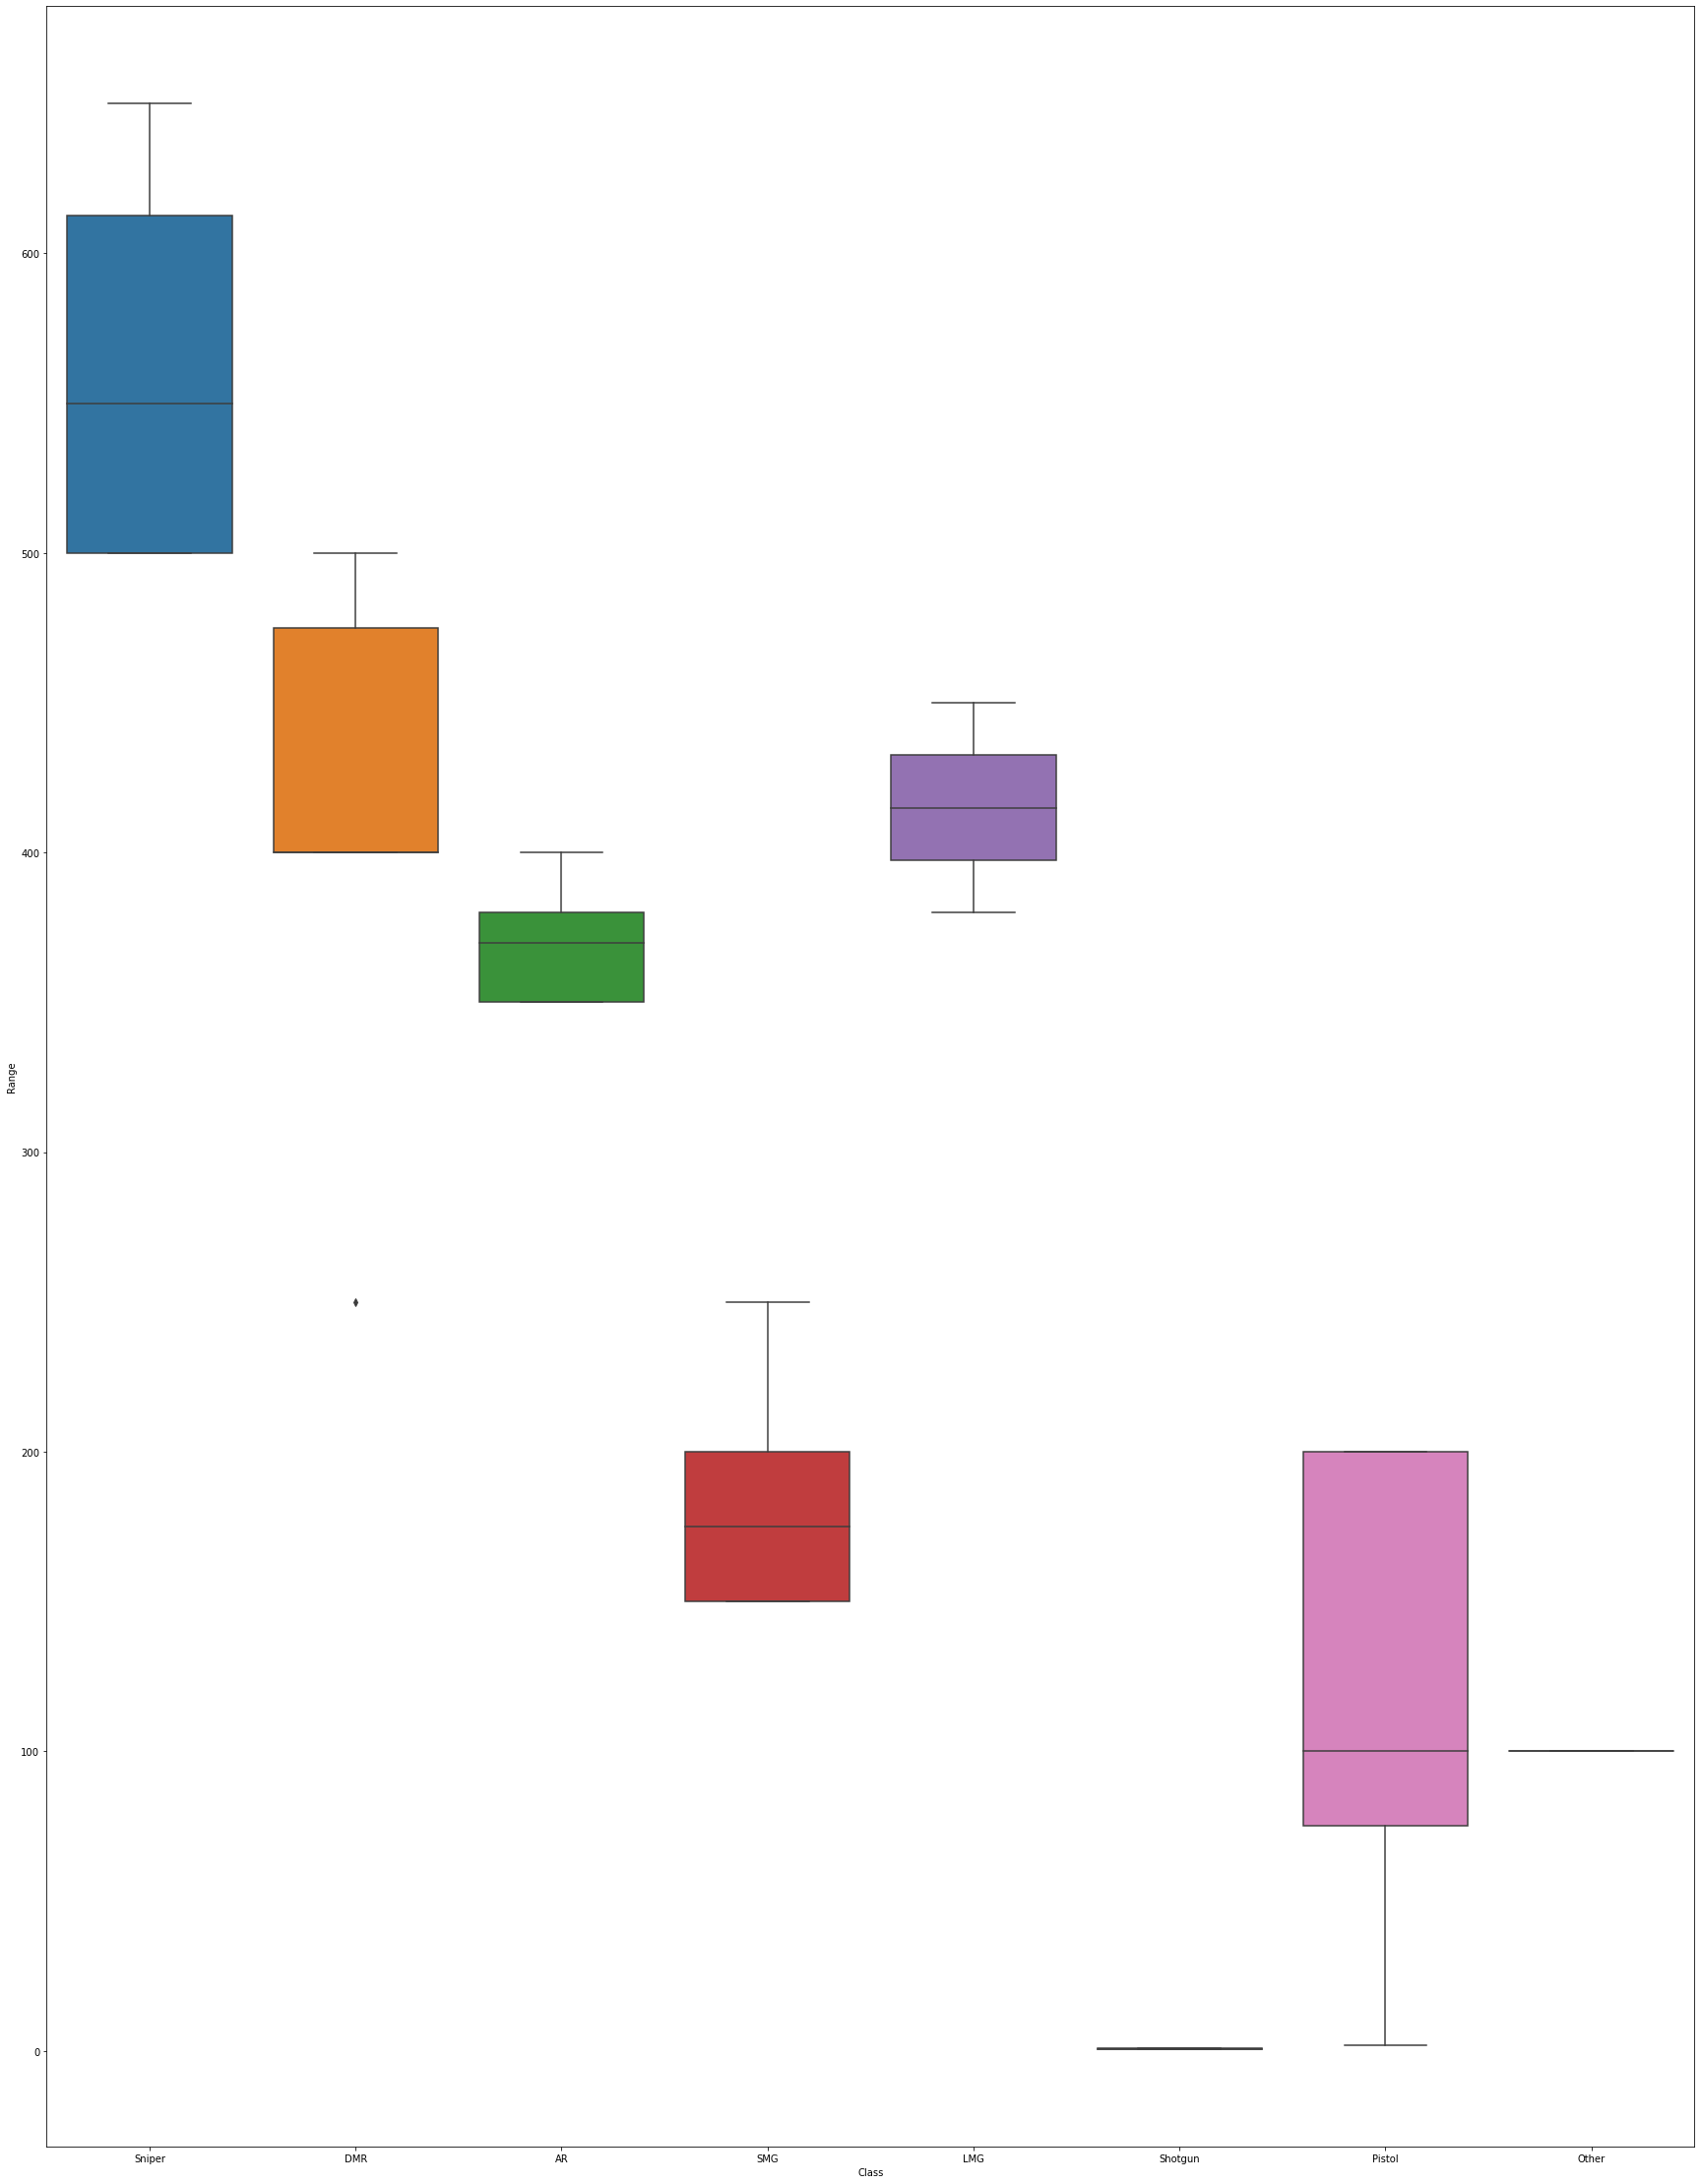

In [82]:
# Guns grouped by ranged 
range_grouped = gun_df.groupby('Class')['Range'].mean().reset_index()
plt.figure(figsize=(30,40))
sns.boxplot(x=gun_df['Class'],y=gun_df['Range'],data=range_grouped)

When comparing range, we see that sniper rifles have the most range by far, followed by the marks men rifle and the Assault rifle class 

So from the data we can conclude that for engagements  over a long distance you should use a sniper rifle, for mid to far an Assal rife would be the best choice, and then for close range you should look at a shot gun  

----------------------------------------------------------------------------------------------------

From the data we can determent that the best classes to use is the Assault rifle and the sniper rifle and shot gun 
The shotgun is for close range, sniper for long range and the assault rifle is for the mid to close  

the Assault rifle is over all the best but the sniper is better for focusing a target over range and the shot gun for close encounters. Now these two classes will be analyzed to see which one in the class will be the best to use. 



In [40]:
# Damage of the Sniper rifel sub class  
damage_sniper = gun_df[gun_df["Class"] == "Sniper"][["Damage", "Name"]].sort_values("Damage", ascending  = False)
damage_sniper.head()

,Damage,Name
0,105,AWM
1,79,M24
2,75,Kar98k
3,66,Win94


<AxesSubplot:xlabel='Name', ylabel='Damage'>

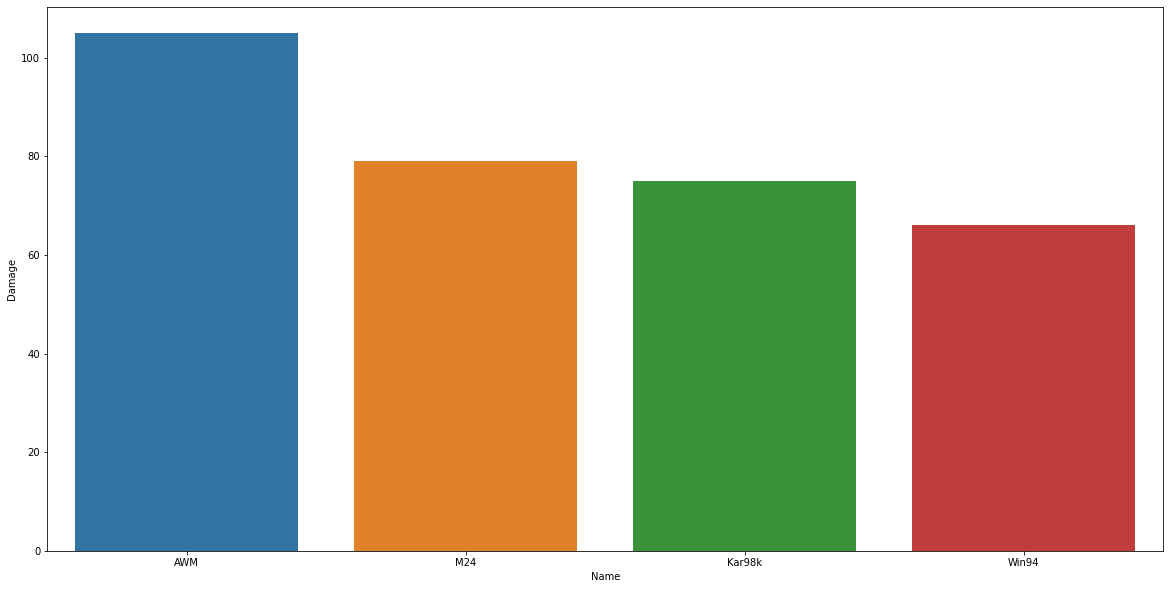

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(x=damage_sniper['Name'],y=damage_sniper['Damage'],data=damage_sniper)

Here we can see that the AWM is the most powerful sniper rifle followed by the M24, so i would suggest using one of these if they are found by the player, i would recommend staying away from the Win94 because it the worst in it class 


In [61]:
# ammo type of the Sniper rifel sub class  
AM_sniper = gun_df[gun_df["Class"] == "Sniper"][["Ammo", "Name"]].sort_values("Ammo", ascending  = False).reset_index()
AM_sniper.head()

,index,Ammo,Name
0,1,7.62,M24
1,2,7.62,Kar98k
2,3,0.45,Win94
3,0,0.300,AWM


Here we can see that the AWM uses the 0.300 ammo which is very hard to get, so i would suggest that when given the choice the player should go with the M24 when considering damage and ammo availability 

In [48]:
# Damage of the assalt rifel sub class  
damage_AR = gun_df[gun_df["Class"] == "AR"][["Damage", "Name"]].sort_values("Damage", ascending  = False).reset_index()
damage_AR.head()

,index,Damage,Name
0,10,49,Groza
1,11,49,AKM
2,12,49,Mk47Mutant
3,13,47,BerylM762
4,14,43,AUG A3


<AxesSubplot:xlabel='Name', ylabel='Damage'>

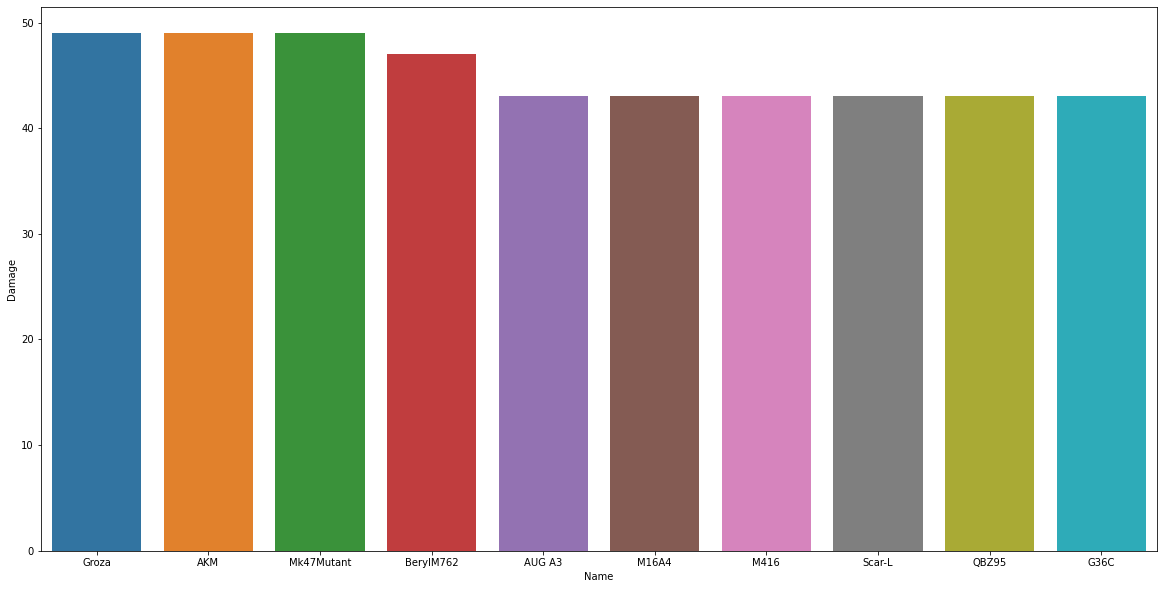

In [49]:

# AS wepon damage sub class 
plt.figure(figsize=(20,10))
sns.barplot(x=damage_AR['Name'],y=damage_AR['Damage'],data=damage_AR)

Here we can see that the Groza, AKM and Mk47 Mutant is the best weapons to use when it comes to damages in the assault rifle class. 

In [52]:
# ammo type of the assalt rifel sub class  
AM_AR = gun_df[gun_df["Class"] == "AR"][["Ammo", "Name"]].sort_values("Ammo", ascending  = False).reset_index()
AM_AR.head()

,index,Ammo,Name
0,10,7.62,Groza
1,11,7.62,AKM
2,12,7.62,Mk47Mutant
3,13,7.62,BerylM762
4,14,5.56,AUG A3


Here we can see that the guns that do the most damage has the ammo that is the most widely available, which mean that Groza, AKM and Mk47 Mutant are the top picks in the Assault rifle class 

In [83]:
# Damage of the Shot gun sub class  
damage_shotgun = gun_df[gun_df["Class"] == "Shotgun"][["Damage", "Name"]].sort_values("Damage", ascending  = False)
damage_shotgun.head()

,Damage,Name
28,216,S686
29,216,S1897
30,198,S12k


<AxesSubplot:xlabel='Name', ylabel='Damage'>

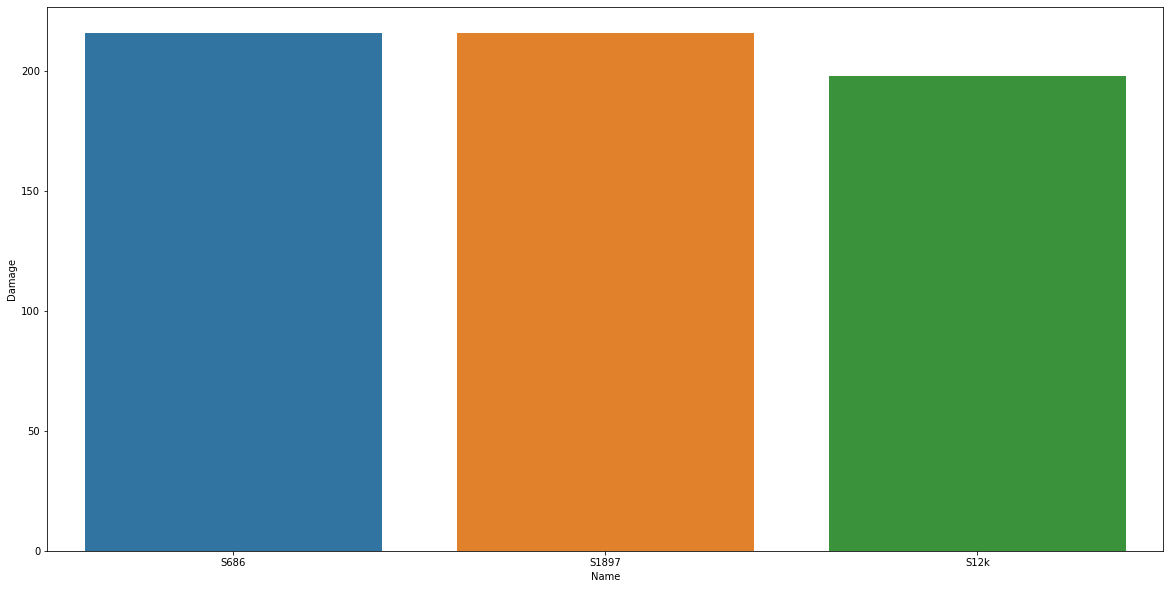

In [85]:

plt.figure(figsize=(20,10))
sns.barplot(x=damage_shotgun['Name'],y=damage_shotgun['Damage'],data=damage_shotgun)

Here we can see that the damage for the shot guns is cute uniform so it does not really matter which one the player pick when looking at damage. 

<AxesSubplot:xlabel='Name', ylabel='Range'>

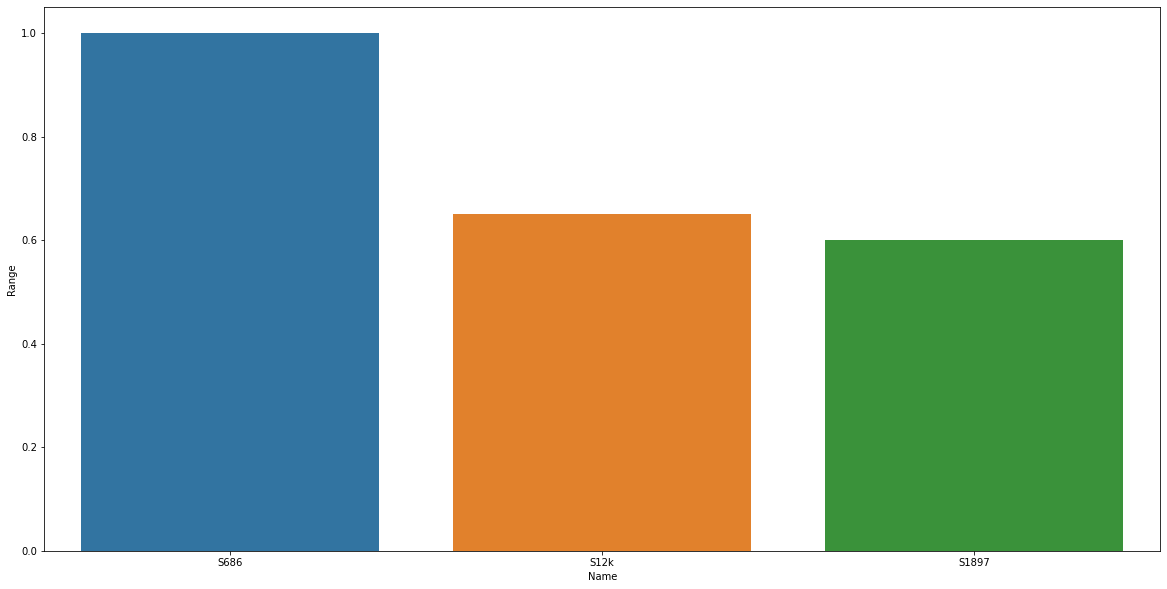

In [89]:
#Shot guns grouped by range
range_shotgun = gun_df[gun_df["Class"] == "Shotgun"][["Range", "Name"]].sort_values("Range", ascending  = False)
range_shotgun.head()
plt.figure(figsize=(20,10))
sns.barplot(x=range_shotgun['Name'],y=range_shotgun['Range'],data=range_shotgun)

Here we can see that the S686 has the best range of all the shot guns 

__________________________________________________________________________


In summery  

  
players have different play styles, but it can manly be categorized into 3 classes  

1. long range  
2. mind range  
3. close range  

So, the best class to use  
if you prefer to play long range is the Sniper rifle class is the best and the one that would work the best in the class is the M24 

if you prefer mid-range the class that world work best is the Assault rifle and here the player, can choose between the Groza, AKM or Mk47 

if the player prefers close range the best class to use is a shot gun and here the S686 is the best one in the class because it has the best ranges and that makes a huge difference. 

but for the overall the Assault rifle will be the best because engagements do take place over long and short ranges so it will be a lot more versatile 